In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
listings = pd.read_csv("listingsdf.csv");
geofile = gpd.read_file('neighbourhoods.geojson',driver='GeoJSON')

In [28]:
print(len(geofile))
geofile.rename(columns={'neighbourhood':'neighborhood','neighbourhood_group':'borough'},inplace=True)
geofile.sort_values(by=['neighborhood'],ascending=True,inplace=True)
geofile.head()

140


,neighborhood,borough,geometry
131,Adlershof,Treptow - Köpenick,"MULTIPOLYGON (((13.55429 52.42581, 13.55424 52..."
53,Albrechtstr.,Steglitz - Zehlendorf,"MULTIPOLYGON (((13.32681 52.46139, 13.32700 52..."
17,Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52..."
67,Allende-Viertel,Treptow - Köpenick,"MULTIPOLYGON (((13.58666 52.44096, 13.58587 52..."
62,Alt Treptow,Treptow - Köpenick,"MULTIPOLYGON (((13.43966 52.48991, 13.43967 52..."


In [14]:
print(listings.columns)
listings.head()

Index(['listing_id', 'host_id', 'neighborhood', 'borough', 'latitude',
       'longitude', 'room_type', 'price', 'square_feet', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating', 'host_is_superhost',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_365', 'count'],
      dtype='object')


,listing_id,host_id,neighborhood,borough,latitude,longitude,room_type,price,square_feet,number_of_reviews,...,accommodates,bathrooms,bedrooms,beds,calculated_host_listings_count,minimum_nights,maximum_nights,availability_30,availability_365,count
0,2015,2217,Brunnenstr. Süd,Mitte,52.53454,13.40256,Entire home/apt,60,NaN,132,...,3,1.0,1.0,0.0,7,4,1125,30,180,1
1,3176,3718,Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,Entire home/apt,90,720.0,146,...,4,1.0,1.0,2.0,1,62,1125,0,0,1
2,3309,4108,Schöneberg-Nord,Tempelhof - Schöneberg,52.49885,13.34906,Private room,28,0.0,27,...,1,1.0,1.0,1.0,1,7,35,29,364,1
3,7071,17391,Helmholtzplatz,Pankow,52.54316,13.41509,Private room,33,NaN,293,...,2,1.0,1.0,2.0,2,1,10,0,61,1
4,9991,33852,Prenzlauer Berg Südwest,Pankow,52.53303,13.41605,Entire home/apt,180,NaN,8,...,7,2.5,4.0,7.0,1,6,14,10,10,1


In [22]:
listings = pd.read_csv("listingsdf.csv");
listings_count=listings;listings_count['count']=1
listings_count.drop(['host_id','room_type','square_feet', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating', 'host_is_superhost',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_365','listing_id','borough', 'latitude',
       'longitude', 'price'],axis=1,inplace=True)
countbyneighborhood=listings_count.groupby('neighborhood').count()
countbyneighborhood.sort_values(by=['neighborhood'],ascending=True,inplace=True)
countbyneighborhood.head()

,count
neighborhood,
Adlershof,34
Albrechtstr.,121
Alexanderplatz,1257
Allende-Viertel,3
Alt Treptow,188


In [33]:
location_count=geofile.set_index('neighborhood').join(countbyneighborhood)
location_count=location_count.reset_index()

#missing values
location_count_missingvalues_df=location_count[location_count.isna().any(axis=1)]    #dataframe containing only rows with any missing values
location_count_missingvalues_columns=location_count.columns[location_count.isna().any()].tolist()  #list of columns with missing values
print('These features have missing values:',location_count_missingvalues_columns)
print('\'neighborhood\' has',location_count['neighborhood'].isna().sum(),'missing values')
print('\'borough\' has',location_count['borough'].isna().sum(),'missing values')
print('\'count\' has',location_count['count'].isna().sum(),'missing values')
print('Two of these missing values belong to neighborhoods without Airbnb listings.\nThe other two are location entries without a neighborhood. I will remove these and add zero to the count of neighborhoods with Airbnb listings.')

location_count_missingvalues_df.head(n=10)

These features have missing values: ['neighborhood', 'borough', 'count']
'neighborhood' has 2 missing values
'borough' has 2 missing values
'count' has 4 missing values
Two of these missing values belong to neighborhoods without Airbnb listings.
The other two are location entries without a neighborhood. I will remove these and add zero to the count of neighborhoods with Airbnb listings.


,neighborhood,borough,geometry,count
30,Forst Grunewald,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.23830 52.46917, 13.23777 52...",NaN
72,Marzahn-Nord,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.54447 52.56685, 13.54458 52...",NaN
138,None,None,"MULTIPOLYGON (((13.61659 52.58154, 13.61458 52...",NaN
139,None,None,"MULTIPOLYGON (((13.61668 52.57868, 13.60703 52...",NaN


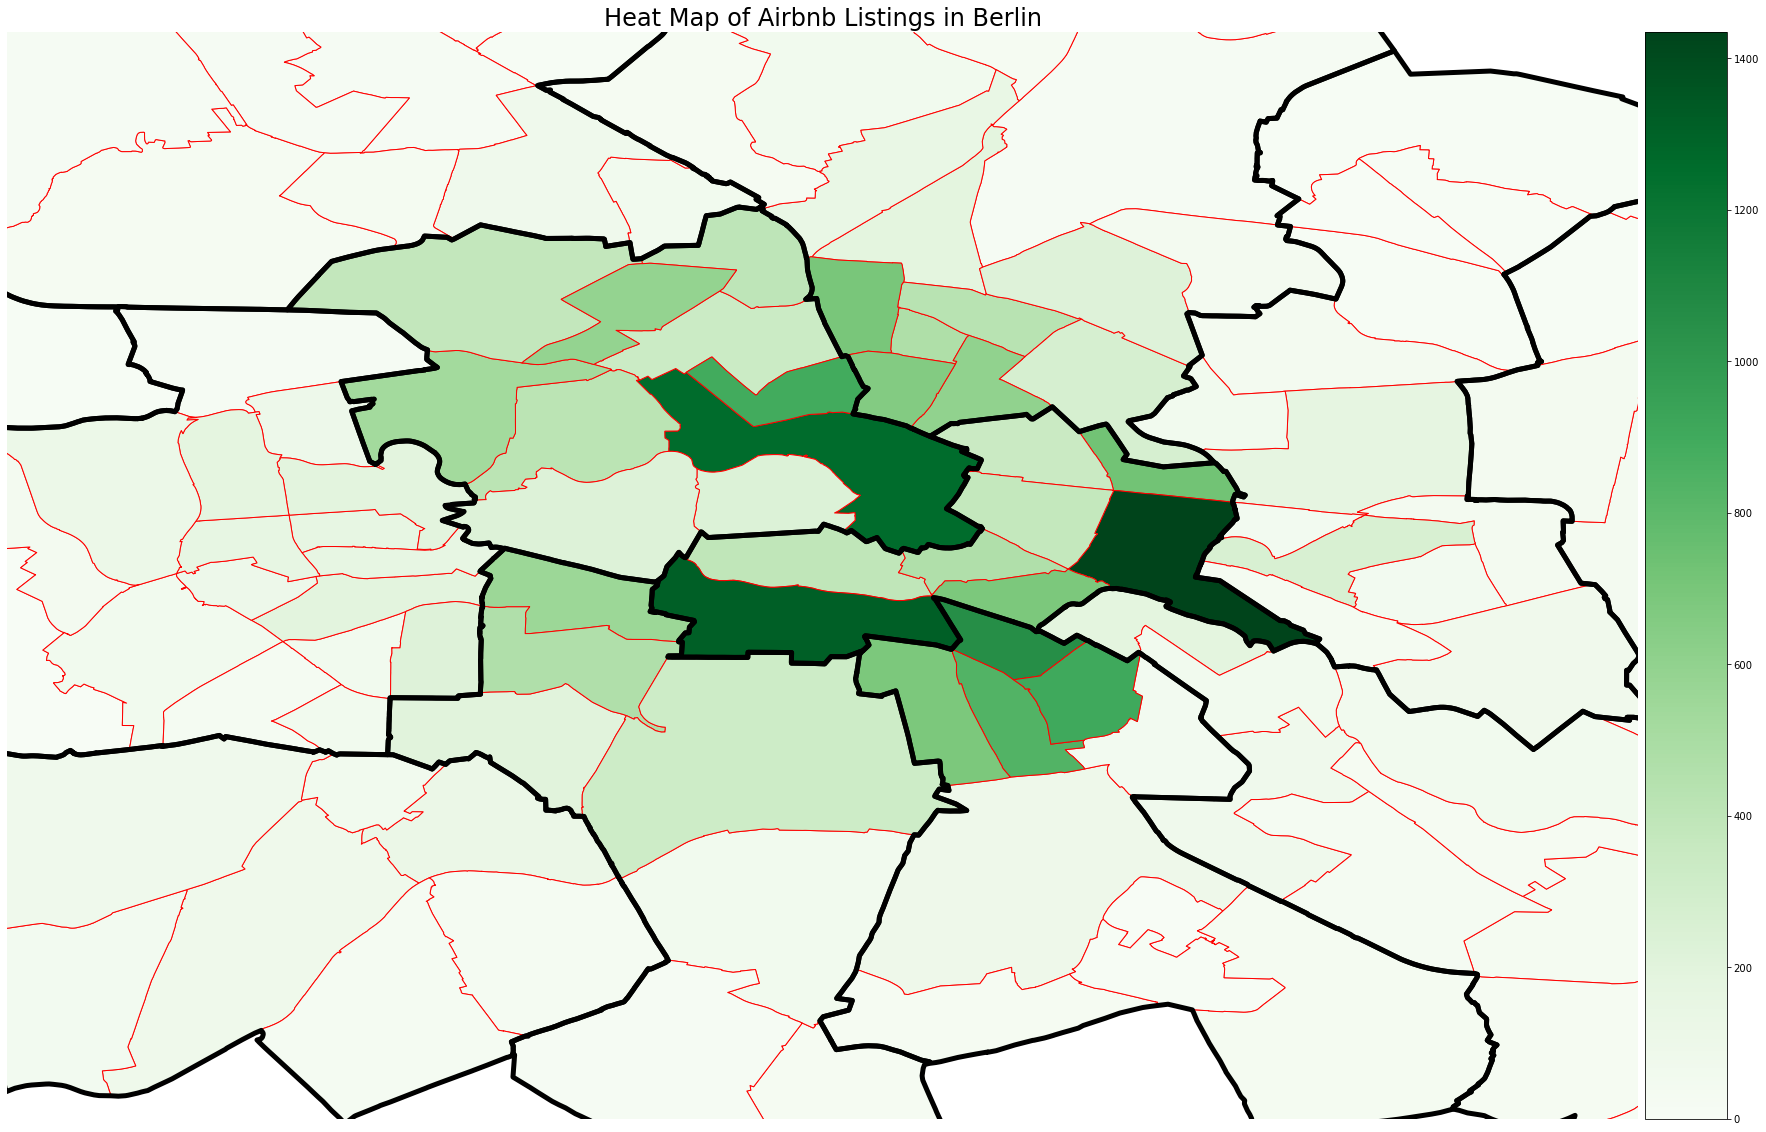

In [127]:
location_count=location_count.fillna(0)
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.axis('off')
ax.set_xlim(13.25,13.55)
ax.set_ylim(52.4,52.6)
ax.set_title('Heat Map of Airbnb Listings in Berlin',fontsize='24')
ax.set_aspect('equal')
#bar=plt.cm.ScalarMappable(cmap='Oranges',norm=plt.Normalize(vmin=0,vmax=100))
#cbar=fig.colorbar(bar);cbar.ax.tick_params(labelsize=20)
divider=make_axes_locatable(ax);cax=divider.append_axes("right",size="5%",pad=0.1)
location_count.plot('count',cmap='Greens', linewidth=1.0,ax=ax,edgecolor='Red',figsize=(40,20),legend=True,cax=cax);
#location_count=location_count.to_crs
boroughs=geofile[['borough','geometry']];
boroughs=boroughs.dissolve(by='borough');
boroughs.boundary.plot(linewidth=5,edgecolor='Black',ax=ax)
plt.show();

In [194]:
import folium
m=folium.Map(location=[52.51, 13.4], zoom_start=12.3,tiles='cartodbpositron')
folium.Choropleth(geo_data=location_count,
key_on="feature.properties.neighborhood",
data=location_count,
columns=['neighborhood','count'],
fill_color='OrRd',
fill_opacity=0.75,
legend_name='Number of Airbnb Listings',
style_function = lambda x: {
        'color': 'red',
        'weight': .6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['neighborhood', 'Count'],
        aliases=['Neighborhood', 'Airbnb Count'],
        localize=True
    )).add_to(m)

folium.GeoJson(boroughs,
style_function = lambda x: {
        'color': 'black',
        'weight': 4,
        'fillOpacity': 0
    }).add_to(m)
folium.map.CustomPane('labels').add_to(m)
folium.TileLayer('CartoDBPositronOnlyLabels',pane='labels').add_to(m)

#save
m.save("berlinairbnb.html")

m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_af0eaf1b6f8d4ecb9595ec98e6b0d28f%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js%22%3E%3C/script%3E%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_af0eaf1b6f8d4ecb9595ec98e6b0d28f%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_af0eaf1b6f8d4ecb9595ec98e6b0d28f%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_af0eaf1b6f8d4ecb9595ec98e6b0d28f%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B52.51%2C%2013.4%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EP